## Final Project Submission

Please fill out:
* Student name: Group 9 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview ##

The primary goal of the project is to build a predictive model that can estimate/predict the house prices in King County, Washington ,USA based on its features,provide valuable insights through comparative market analysis in order to facilitate informed decision making.
The target audience includes real estate analysts,real estate investors,data scientists,machine learning practioners,financial institutions,potential home buyers and potential tenants.
The dataset used is the King County House dataset accessible from [Download File](https://drive.google.com/drive/folders/1mvDwz8l4KN7X-_WszLC-WEjiQ4ZgNbNm?usp=drive_link)

## Business Problem ##

The real estate industry is facing several multifaceted challenges that stem from macroeconomic factors such as inflation, high-interest rates, and market competition. These challenges include lead acquisition difficulties, precise property pricing, and the impact of demographic shifts on market trends. 

To address these challenges, the primary objective of this project is to empower all stakeholders in the real estate industry with data-backed decision-making. This will be achieved by providing comprehensive insights and analytics that will enable stakeholders to make informed decisions that will enhance profitability and mitigate potential losses.

Key stakeholders, including analysts, investors, agents, financial institutions, buyers, tenants, government, and appraisers, are integral to the industry. By harnessing the power of data, all these stakeholders can make data-driven decisions and contribute to a more resilient and prosperous real estate ecosystem.

The project will use predictive models to provide accurate pricing information based on available data. This data-driven approach will ensure that stakeholders can make informed decisions, thereby contributing to a more resilient and prosperous real estate ecosystem. By addressing these multifaceted challenges with the power of data, this project will create a brighter future for the real estate industry.

## Data Understanding ##

### Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#To load 'KC_house_data.csv' as a dataframe
# copy the file path to access the file since its in a different directory
file_path = './kc_house_data.csv'
KC = pd.read_csv(file_path)
print(KC.head())

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.2

In [3]:
KC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Exploring the Dataset

In [4]:
# missing values
KC.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Checking for duplicate values
duplicates = KC.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [6]:
# I wanted to fill missing values in 'waterfront' and 
# 'view' with 'NONE' to indicate no waterfront information or view.
# I also filled missing values in 'yr_renovated' with 0 to indicate no renovation year.
# Handling missing values as suggested
KC['waterfront'].fillna('NO', inplace=True)
KC['view'].fillna('NONE', inplace=True)
KC['yr_renovated'].fillna(0, inplace=True)

In [7]:
# Dropping all the un wanted columns from the DataFrame
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
KC = KC.drop(columns=columns_to_drop)

In [8]:
KC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [9]:
# Checking unique values for categorical columns
categorical_columns = ['waterfront', 'condition', 'grade']

for column in categorical_columns:
    unique_values = KC[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")

Unique values in 'waterfront' column: ['NO' 'YES']
Unique values in 'condition' column: ['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Unique values in 'grade' column: ['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [10]:
# Check data types and missing values
# Columns to analyze
columns_to_analyze = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
data_info = KC[columns_to_analyze].info()
missing_values = KC[columns_to_analyze].isnull().sum()

print("Data Types and Missing Values:")
print(data_info)
print("\nMissing Values:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB
Data Types and Missing Values:
None

Missing Values:
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
yr_built       0
dtype: int64


In [11]:
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

# Check for infinite values in the specified columns
inf_values_exist = KC[columns_to_check].isin([np.inf, -np.inf]).any().any()

# Print the result
if inf_values_exist:
    print("The DataFrame has infinite values in the specified columns.")
else:
    print("No infinite values found in the specified columns.")

No infinite values found in the specified columns.


### Handling outliers

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


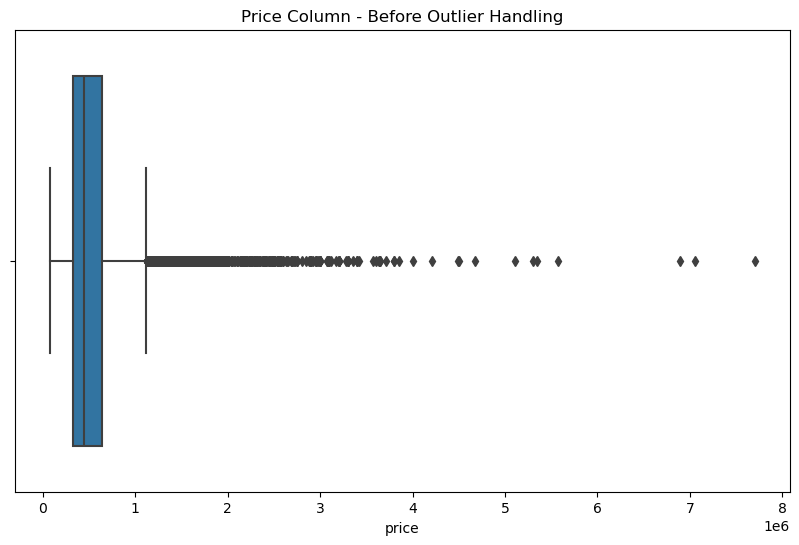

In [13]:
# 1. Price Column
# Before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=KC['price'])
plt.title('Price Column - Before Outlier Handling')
plt.show()

In [14]:
from scipy.stats import zscore

# Calculating Z-scores for 'price' column
z_scores_price = zscore(KC['price'])

z_threshold = 3

# Identify outliers based on Z-scores
outliers_price = KC[abs(z_scores_price) > z_threshold]
print(f'Number of outliers in price (Z-score method): {len(outliers_price)}')
# Price Column
upper_limit_price = KC['price'].quantile(0.95)
KC['price'] = np.where(KC['price'] > upper_limit_price, upper_limit_price, KC['price'])

Number of outliers in price (Z-score method): 406


C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


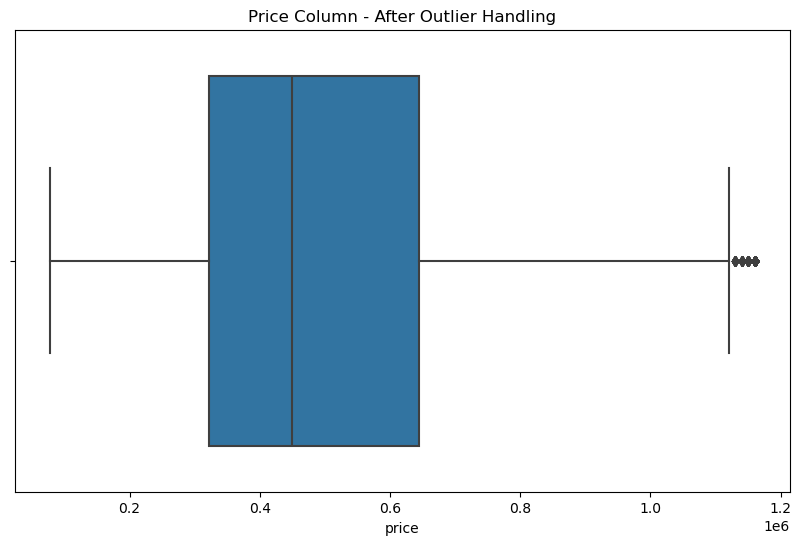

In [15]:
# After handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=KC['price'])
plt.title('Price Column - After Outlier Handling')
plt.show()

In [16]:
# Count values of bedrooms before handling outliers
bedroom_counts_before = KC['bedrooms'].value_counts()

# Display the count values
print("Bedroom Counts Before Handling Outliers:")
print(bedroom_counts_before)

Bedroom Counts Before Handling Outliers:
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64


Based on the above output, it shows the count of houses with different numbers of bedrooms. The count distribution suggests that most houses have 3 to 4 bedrooms, with a significant drop in frequency for houses with 5 or more bedrooms. There are also a few houses with 1 or 2 bedrooms.
So we decided to use capping/winsorizing to deal with the outliera by setting a threshold based on the 95th percentile of the data. This approach using the 95th percentile is more data-driven and adapts to the distribution of the 'bedrooms' column.

In [17]:
# Bedrooms Column
# We will replace any house with a number of bedrooms greater than this 95th percentile is replaced with the value at the 95th percentile.
# Handling outliers in bedrooms
upper_limit_bedrooms = KC['bedrooms'].quantile(0.95)
KC['bedrooms'] = np.where(KC['bedrooms'] > upper_limit_bedrooms, upper_limit_bedrooms, KC['bedrooms'])

C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


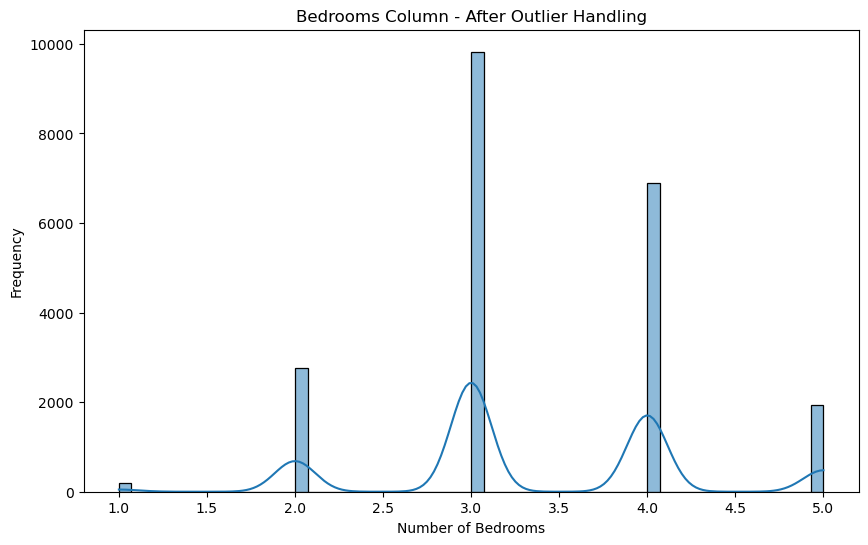

In [18]:
# Distribution of bedrooms after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(KC['bedrooms'], kde=True)
plt.title('Bedrooms Column - After Outlier Handling')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 1. Bathrooms Column - Before handling outliers
bathrooms_counts_before = KC['bathrooms'].value_counts().sort_index()
print("Bathroom Counts Before Handling Outliers:")
print(bathrooms_counts_before)

Bathroom Counts Before Handling Outliers:
bathrooms
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64


In [20]:
# Bathrooms Column - Handling outliers
upper_limit_bathrooms = KC['bathrooms'].quantile(0.95)
KC['bathrooms'] = np.where(KC['bathrooms'] > upper_limit_bathrooms, upper_limit_bathrooms, KC['bathrooms'])

# Count the values after handling outliers
bathrooms_counts_after = KC['bathrooms'].value_counts().sort_index()
print("Bathroom Counts After Handling Outliers:")
print(bathrooms_counts_after)

Bathroom Counts After Handling Outliers:
bathrooms
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50    1288
Name: count, dtype: int64


In [21]:
# Sqft_living Column
z_scores_sqft_living = zscore(KC['sqft_living'])
z_threshold = 3
outliers_sqft_living = KC[abs(z_scores_sqft_living) > z_threshold]
print(f'Number of outliers in sqft_living (Z-score method): {len(outliers_sqft_living)}')

Number of outliers in sqft_living (Z-score method): 248


In [22]:
# Winsorizing to replace extreme values
upper_limit_sqft_living = KC['sqft_living'].quantile(0.95)
KC['sqft_living'] = np.where(KC['sqft_living'] > upper_limit_sqft_living, upper_limit_sqft_living, KC['sqft_living'])

In [23]:
# Calculating Z-scores for 'sqft_living' column
z_scores_sqft_living_log = zscore(KC['sqft_living'])
z_threshold = 3

# Identify outliers based on Z-scores
outliers_sqft_living_log = KC[abs(z_scores_sqft_living_log) > z_threshold]
print(f'Number of outliers in sqft_living (Z-score method) after Winsorizing: {len(outliers_sqft_living_log)}')

Number of outliers in sqft_living (Z-score method) after Winsorizing: 0


In [24]:
# Sqft_lot Column - Before handling outliers
z_scores_sqft_lot = zscore(KC['sqft_lot'])
z_threshold = 3

# Identify outliers based on Z-scores
outliers_sqft_lot = KC[abs(z_scores_sqft_lot) > z_threshold]
print(f'Number of outliers in sqft_lot (Z-score method): {len(outliers_sqft_lot)}')

Number of outliers in sqft_lot (Z-score method): 346


C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


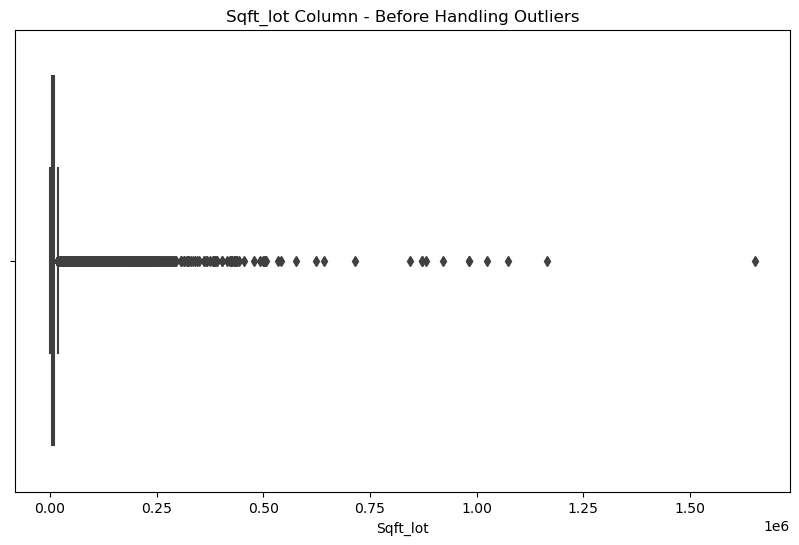

In [25]:
# Boxplot of 'sqft_lot' before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=KC['sqft_lot'])
plt.title('Sqft_lot Column - Before Handling Outliers')
plt.xlabel('Sqft_lot')
plt.show()

In [26]:
upper_limit_sqft_lot = KC['sqft_lot'].quantile(0.75)

# Identify values above the 75th percentile
above_75th_percentile = KC['sqft_lot'] > upper_limit_sqft_lot

# the mode of the 'sqft_lot' column
mode_sqft_lot = KC['sqft_lot'].mode().values[0]

# Replace values above the 75th percentile with the mode
KC.loc[above_75th_percentile, 'sqft_lot'] = mode_sqft_lot

In [27]:
# Calculating Z-scores for 'sqft_lot' column after log transformation
z_scores_sqft_lot = zscore(KC['sqft_lot'])
z_threshold = 3
outliers_sqft_lot = KC[abs(z_scores_sqft_lot) > z_threshold]
print(f'Number of outliers in sqft_lot (Z-score method) after Replacing: {len(outliers_sqft_lot)}')

Number of outliers in sqft_lot (Z-score method) after Replacing: 0


In [28]:
# Floors Column
z_scores_floors = zscore(KC['floors'])
z_threshold = 3
outliers_floors = KC[abs(z_scores_floors) > z_threshold]
print(f'Number of outliers in floors (Z-score method): {len(outliers_floors)}')

Number of outliers in floors (Z-score method): 7


C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


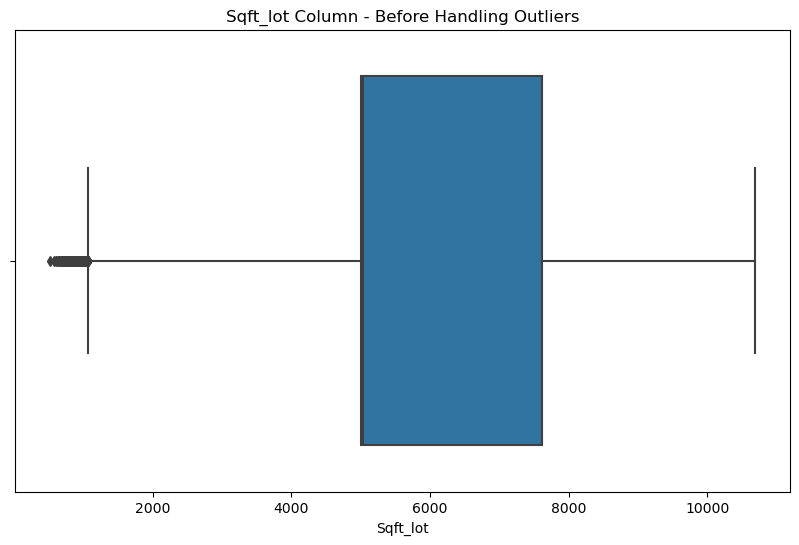

In [29]:
# Boxplot of 'sqft_lot' before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=KC['sqft_lot'])
plt.title('Sqft_lot Column - Before Handling Outliers')
plt.xlabel('Sqft_lot')
plt.show()

In [30]:
# Handling outliers by replacing them with the median
median_floors = KC['floors'].median()
KC['floors'] = np.where(abs(z_scores_floors) > z_threshold, median_floors, KC['floors'])

# Check for outliers after handling
z_scores_floors_after = zscore(KC['floors'])
outliers_floors_after = KC[abs(z_scores_floors_after) > z_threshold]
print(f'Number of outliers in floors after handling: {len(outliers_floors_after)}')

Number of outliers in floors after handling: 0


In [31]:
# Yr_built Column
z_scores_yr_built = zscore(KC['yr_built'])
z_threshold = 3
outliers_yr_built = KC[abs(z_scores_yr_built) > z_threshold]
print(f'Number of outliers in yr_built (Z-score method): {len(outliers_yr_built)}')

Number of outliers in yr_built (Z-score method): 0


In [32]:
# the distribution of 'condition' categories
condition_distribution = KC['condition'].value_counts()
# Print the distribution
print("Condition Distribution:")
print(condition_distribution)

Condition Distribution:
condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64


In [33]:
# the distribution of 'grade' categories
grade_distribution = KC['grade'].value_counts()

# Print the distribution
print("Grade Distribution:")
print(grade_distribution)

Grade Distribution:
grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


In [34]:
# the distribution of 'waterfront' categories
waterfront_distribution = KC['waterfront'].value_counts()

# Print the distribution
print("waterfront Distribution:")
print(waterfront_distribution)

waterfront Distribution:
waterfront
NO     21451
YES      146
Name: count, dtype: int64


In [35]:
# Mapping numerical values for 'condition' column
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
KC['condition'] = KC['condition'].map(condition_mapping)

In [36]:
# Mapping numerical values for 'waterfront' column
KC['waterfront'] = KC['waterfront'].map({'NO': 0, 'YES': 1})

In [37]:
# Mapping numerical values for 'condition' column
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
KC['condition'] = KC['condition'].map(condition_mapping)

In [38]:
# Mapping numerical values for 'grade' column
grade_mapping = {'3 Poor': 1, '4 Low': 2, '5 Fair': 3, '6 Low Average': 4, '7 Average': 5,
                 '8 Good': 6, '9 Better': 7, '10 Very Good': 8, '11 Excellent': 9,
                 '12 Luxury': 10, '13 Mansion': 11}
KC['grade'] = KC['grade'].map(grade_mapping)

In [39]:
# Performing one-hot encoding for categorical columns
categorical_columns = ['waterfront', 'condition', 'grade']
KC_encoded = pd.get_dummies(KC, columns=categorical_columns, drop_first=True)

In [40]:
# Converting all columns to numerical
KC_encoded = KC_encoded.apply(pd.to_numeric, errors='ignore')

In [41]:
print(KC_encoded.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0       3.0       1.00       1180.0      5650     1.0   
1  6414100192  538000.0       3.0       2.25       2570.0      7242     2.0   
2  5631500400  180000.0       2.0       1.00        770.0     10000     1.0   
3  2487200875  604000.0       4.0       3.00       1960.0      5000     1.0   
4  1954400510  510000.0       3.0       2.00       1680.0      8080     1.0   

   yr_built  waterfront_1  grade_2  grade_3  grade_4  grade_5  grade_6  \
0      1955         False    False    False    False     True    False   
1      1951         False    False    False    False     True    False   
2      1933         False    False    False     True    False    False   
3      1965         False    False    False    False     True    False   
4      1987         False    False    False    False    False     True   

   grade_7  grade_8  grade_9  grade_10  grade_11  
0    False    False    False 

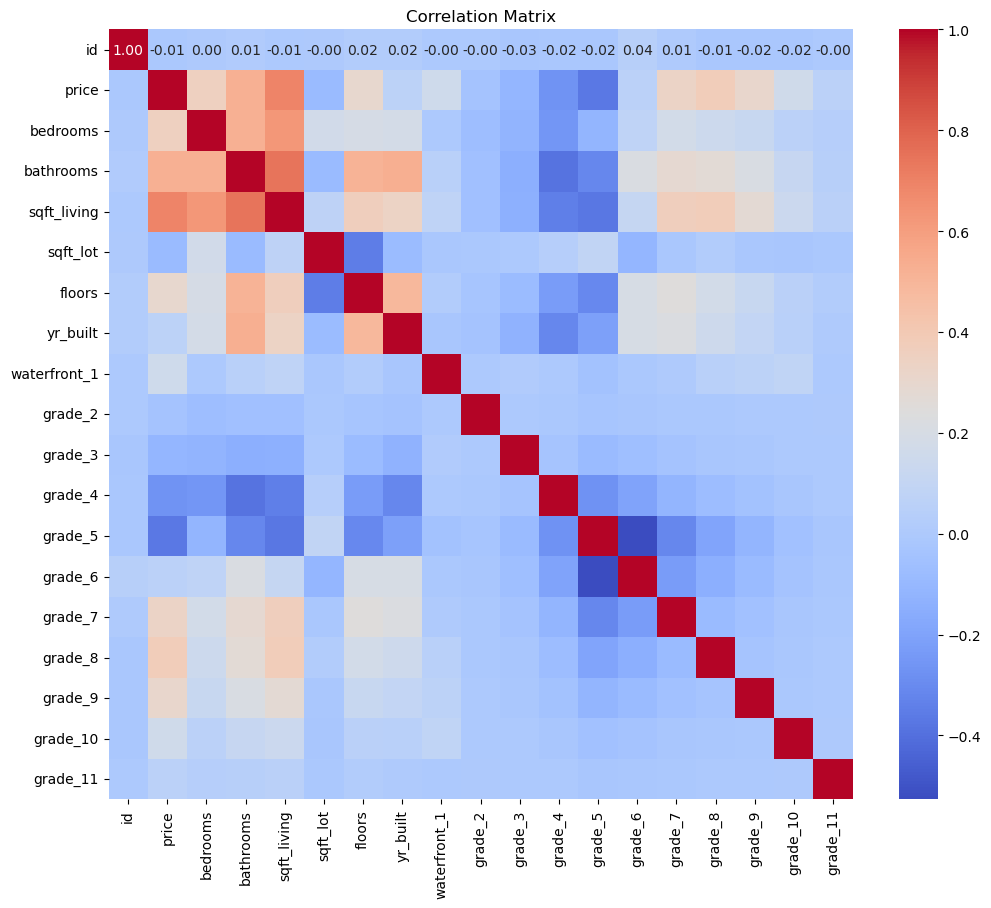

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = KC_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Checking correlation matrix
correlation_matrix = KC[['yr_built', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].corr()

# Display the correlation matrix
print(correlation_matrix)

             yr_built  bedrooms  bathrooms  sqft_living  sqft_lot    floors
yr_built     1.000000  0.180420   0.529704     0.337747 -0.080167  0.489484
bedrooms     0.180420  1.000000   0.527256     0.624966  0.168458  0.189082
bathrooms    0.529704  0.527256   1.000000     0.746055 -0.085780  0.516262
sqft_living  0.337747  0.624966   0.746055     1.000000  0.072436  0.366589
sqft_lot    -0.080167  0.168458  -0.085780     0.072436  1.000000 -0.349702
floors       0.489484  0.189082   0.516262     0.366589 -0.349702  1.000000


In [44]:
# Check the data types of each column
print("Data Types:")
print(KC_encoded.dtypes)

Data Types:
id                int64
price           float64
bedrooms        float64
bathrooms       float64
sqft_living     float64
sqft_lot          int64
floors          float64
yr_built          int64
waterfront_1       bool
grade_2            bool
grade_3            bool
grade_4            bool
grade_5            bool
grade_6            bool
grade_7            bool
grade_8            bool
grade_9            bool
grade_10           bool
grade_11           bool
dtype: object


In [45]:
X = KC_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'waterfront_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']]
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
print(X[numerical_features].describe())

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       3.351901      2.095997   2040.892855   5932.812567      1.493448   
std        0.846956      0.714947    797.583311   2222.272202      0.538473   
min        1.000000      0.500000    370.000000    520.000000      1.000000   
25%        3.000000      1.750000   1430.000000   5000.000000      1.000000   
50%        3.000000      2.250000   1910.000000   5040.000000      1.500000   
75%        4.000000      2.500000   2550.000000   7618.000000      2.000000   
max        5.000000      3.500000   3760.000000  10685.000000      3.000000   

           yr_built  
count  21597.000000  
mean    1970.999676  
std       29.375234  
min     1900.000000  
25%     1951.000000  
50%     1975.000000  
75%     1997.000000  
max     2015.000000  


### Model Building

#### Based Model

In [46]:
import statsmodels.api as sm
X = sm.add_constant(KC_encoded['sqft_living'])
y = KC_encoded['price']

In [47]:
model = sm.OLS(y, X).fit()
print(model.params)

const          63414.679663
sqft_living      220.425445
dtype: float64


In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.988e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:47:30   Log-Likelihood:            -2.9237e+05
No. Observations:               21597   AIC:                         5.847e+05
Df Residuals:                   21595   BIC:                         5.848e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.341e+04   3425.308     18.514      

In [49]:
# Get residuals
residuals = model.resid

In [50]:
# 4. Independence of Residuals: Durbin-Watson statistic
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("\nDurbin-Watson Statistic:", durbin_watson_statistic)


Durbin-Watson Statistic: 1.9655219932090482


C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


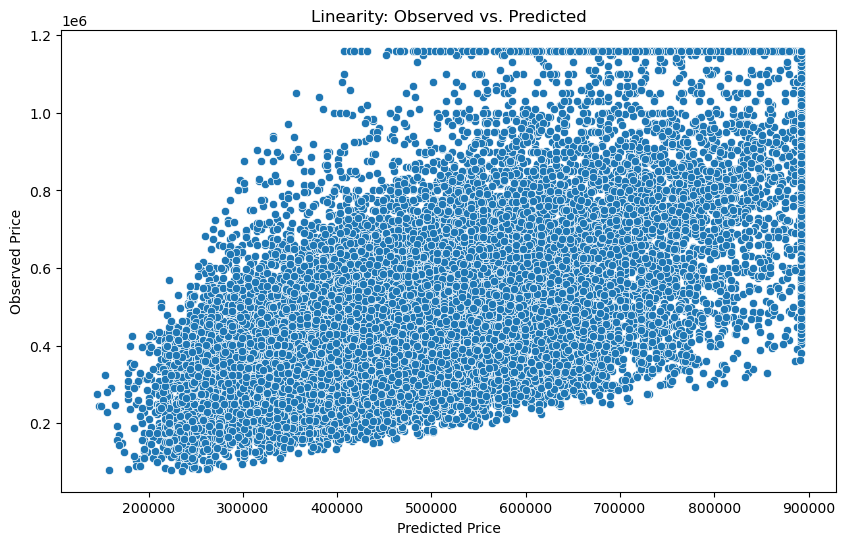

In [51]:
# 1. Linearity: Scatterplot of observed vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(), y=y)
plt.title('Linearity: Observed vs. Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Observed Price')
plt.show()

1. Assumptions
The model is strong positive linear distribution in the scatterplot indicates a good fit of the model to the data in terms of linearity.

C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


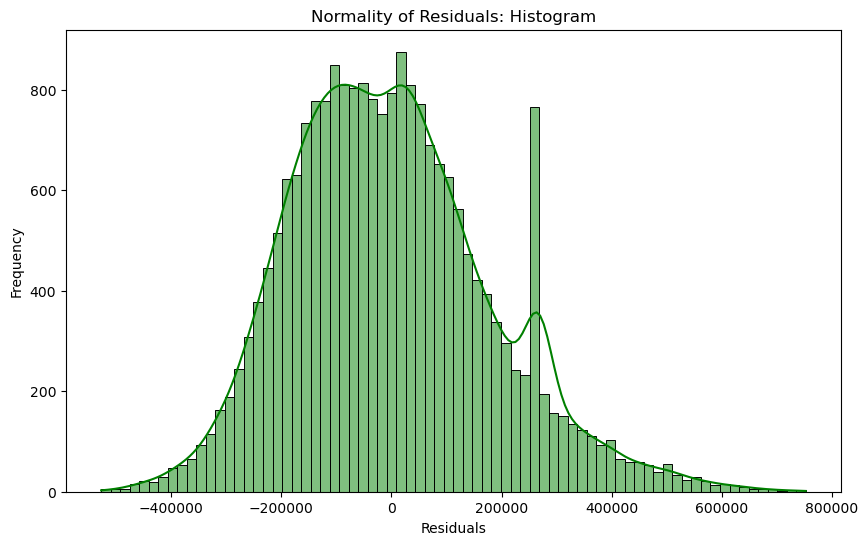

In [52]:
# 2. Normality of Residuals: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, color='green', kde=True)  # Green color with KDE (Kernel Density Estimation)
plt.title('Normality of Residuals: Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

2. Assumption
Based on the histogram we can conlude that he histogram indicates a generally normal distribution of residuals, which is a good sign for the normality assumption. The unsual peak may be an area where the model tends to have higher residuals.

C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\blase\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


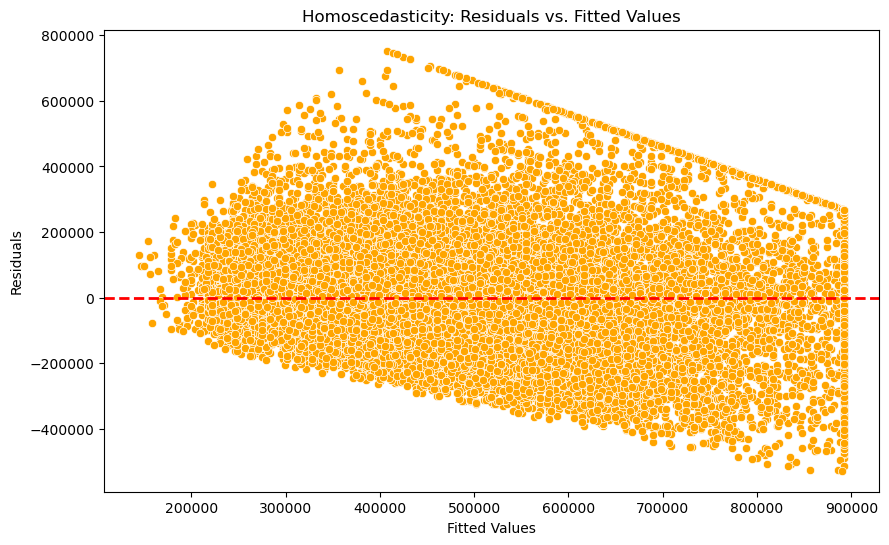

In [53]:
# 3. Homoscedasticity: Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(), y=residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.title('Homoscedasticity: Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### Adding more features to the model

In [54]:
# Selecting independent variables
independent_vars = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'waterfront_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']

In [56]:
# Check for missing values in independent_vars
missing_values = KC_encoded[independent_vars].isnull().sum()
print("Missing Values in independent_vars:")
print(missing_values)

Missing Values in independent_vars:
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
yr_built        0
waterfront_1    0
grade_2         0
grade_3         0
grade_4         0
grade_5         0
grade_6         0
grade_7         0
grade_8         0
grade_9         0
grade_10        0
grade_11        0
dtype: int64


In [57]:
# Check the data types of independent_vars
print("Data Types of independent_vars:")
print(KC_encoded[independent_vars].dtypes)

Data Types of independent_vars:
sqft_living     float64
bedrooms        float64
bathrooms       float64
floors          float64
yr_built          int64
waterfront_1       bool
grade_2            bool
grade_3            bool
grade_4            bool
grade_5            bool
grade_6            bool
grade_7            bool
grade_8            bool
grade_9            bool
grade_10           bool
grade_11           bool
dtype: object


In [58]:
# Adding a constant term
X = sm.add_constant(KC_encoded[independent_vars])

In [64]:
bool_columns = ['waterfront_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']

# Convert boolean columns to numeric
KC_encoded[bool_columns] = KC_encoded[bool_columns].astype(int)

In [65]:
# Now, run the regression model again
X = sm.add_constant(KC_encoded['sqft_living'])
y = KC_encoded['price']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.988e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:            -2.9237e+05
No. Observations:               21597   AIC:                         5.847e+05
Df Residuals:                   21595   BIC:                         5.848e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.341e+04   3425.308     18.514      

### Model Evaluation

In [ ]:
import statsmodels.api as sm

# Ensure all values in X_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values
X_train = X_train.dropna()

# Add a constant to X_train
X_train_constant = sm.add_constant(X_train)

# Fit the model
model_with_constant = sm.OLS(y_train, X_train_constant).fit()

# Display the summary
print(model_with_constant.summary())


### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Feature selection
sfm = SelectFromModel(model)
sfm.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train.columns[sfm.get_support()]

# Ensure that the number of columns matches
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retraining the model
model.fit(scaler.transform(X_train_selected), y_train)
y_pred_selected = model.predict(scaler.transform(X_test_selected))

# Evaluating the model with selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)
print(f'Mean Squared Error (Selected Features): {mse_selected}')
print(f'R-squared (Selected Features): {r2_selected}')
